## Creating CNN Using Scratch And Transfer Learning

Please download the dataset from the below url

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [39]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Malaria-Detection-master/Dataset/Train'
valid_path = '/content/drive/My Drive/Malaria-Detection-master/Dataset/Test'


In [40]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [41]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [42]:
  # useful for getting number of output classes
folders = glob('/content/drive/My Drive/Malaria-Detection-master/Dataset/Train/*')

In [43]:
folders

['/content/drive/My Drive/Malaria-Detection-master/Dataset/Train/Uninfected',
 '/content/drive/My Drive/Malaria-Detection-master/Dataset/Train/Parasite']

In [44]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [45]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [46]:
# view the structure of the model
model.summary()


Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [47]:
from tensorflow.keras.layers import MaxPooling2D

In [48]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 50176)            

In [49]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [50]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [51]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Malaria-Detection-master/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [52]:
training_set

In [53]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Malaria-Detection-master/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [54]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
13/13 [==============================] - 5s 358ms/step - loss: 2.1839 - accuracy: 0.5216 - val_loss: 0.8191 - val_accuracy: 0.3582
Epoch 2/50
13/13 [==============================] - 4s 343ms/step - loss: 0.5832 - accuracy: 0.7019 - val_loss: 0.8701 - val_accuracy: 0.3134
Epoch 3/50
13/13 [==============================] - 4s 345ms/step - loss: 0.4577 - accuracy: 0.7740 - val_loss: 1.1334 - val_accuracy: 0.3582
Epoch 4/50
13/13 [==============================] - 4s 345ms/step - loss: 0.4790 - accuracy: 0.7716 - val_loss: 0.6527 - val_accuracy: 0.5821
Epoch 5/50
13/13 [==============================] - 5s 348ms/step - loss: 0.4294 - accuracy: 0.8005 - val_loss: 0.9344 - val_accuracy: 0.4328
Epoch 6/50
13/13 [==============================] - 5s 351ms/step - loss: 0.3813 - accuracy: 0.8125 - val_loss: 0.9388 - val_accuracy: 0.5373
Epoch 7/50
13/13 [==============================] - 5s 349ms/step - loss: 0.3373 - accuracy: 0.8486 - val_loss: 0.7428 - val_accuracy: 0.5746
Epoch 

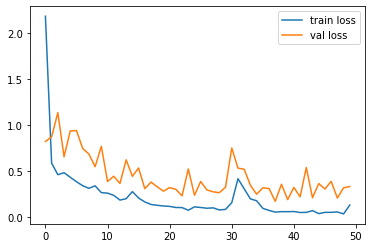

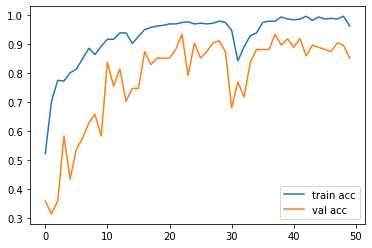

<Figure size 432x288 with 0 Axes>

In [55]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [56]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [57]:

y_pred = model.predict(test_set)


In [58]:
y_pred

array([[9.84190524e-01, 1.58094708e-02],
       [1.11311048e-01, 8.88688982e-01],
       [7.65189648e-01, 2.34810382e-01],
       [6.82250023e-01, 3.17750007e-01],
       [1.62926897e-01, 8.37073147e-01],
       [5.81209004e-01, 4.18790966e-01],
       [9.62765336e-01, 3.72347124e-02],
       [9.70866978e-01, 2.91330144e-02],
       [9.92200911e-01, 7.79912993e-03],
       [9.87031937e-01, 1.29680047e-02],
       [4.90757287e-01, 5.09242713e-01],
       [6.56063914e-01, 3.43936056e-01],
       [7.34116137e-01, 2.65883833e-01],
       [9.83332872e-01, 1.66671723e-02],
       [9.99803603e-01, 1.96424662e-04],
       [2.67680645e-01, 7.32319415e-01],
       [9.96888459e-01, 3.11152916e-03],
       [5.15735090e-01, 4.84264851e-01],
       [9.70751792e-02, 9.02924836e-01],
       [1.43310940e-02, 9.85668898e-01],
       [7.23476052e-01, 2.76523888e-01],
       [7.23819554e-01, 2.76180506e-01],
       [9.97933030e-01, 2.06693332e-03],
       [5.82893848e-01, 4.17106211e-01],
       [3.270491

In [59]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [60]:
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1])

In [61]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [62]:

model=load_model('model_vgg19.h5')

In [63]:
img=image.load_img('/content/drive/My Drive/Malaria-Detection-master/Dataset/Test/Uninfected/2.png',target_size=(224,224))



In [64]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [65]:
x.shape

(224, 224, 3)

In [66]:
x=x/255

In [67]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [68]:
model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [69]:
a=np.argmax(model.predict(img_data), axis=1)

In [70]:
print(a)

[1]


In [71]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
